In [1]:
from collections import defaultdict
import json
import pandas as pd

In [2]:
with open("score_counts.json") as f:
    score_counts = json.load(f)

<Axes: >

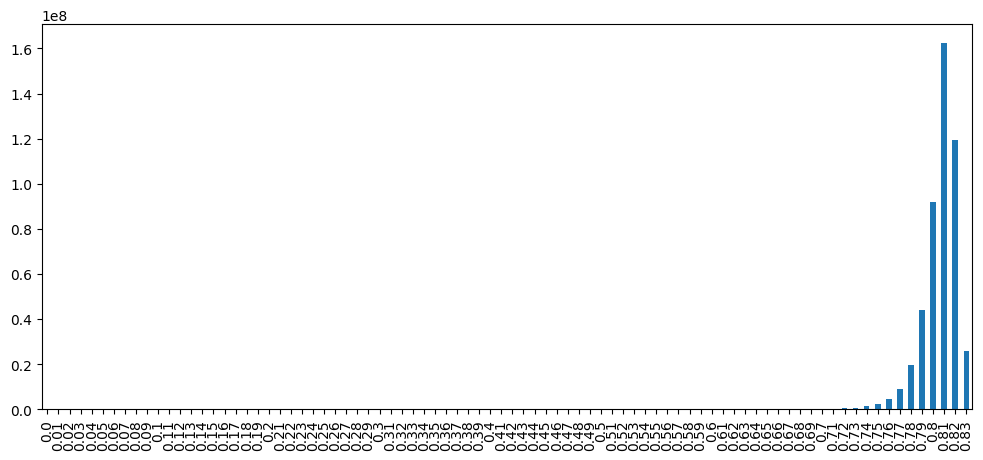

In [3]:
condensed = defaultdict(int)
for value, count in score_counts.items():
    if not pd.isna(float(value)):
        condensed[round(float(value),2)] += count
pd.Series(condensed).sort_index().plot.bar(figsize=(12, 5))

In [4]:
_sum = 0
_len = 0
for value, count in score_counts.items():
    if not pd.isna(float(value)):
        _len += count
        _sum += count*float(value)
mean = _sum / _len

In [5]:
sum_squared_deviation = 0
for value, count in score_counts.items():
    if not pd.isna(float(value)):
        sum_squared_deviation += count*((float(value) - mean)**2)

In [6]:
standard_deviation = (sum_squared_deviation/(_len-1))**(1/2)

<Axes: >

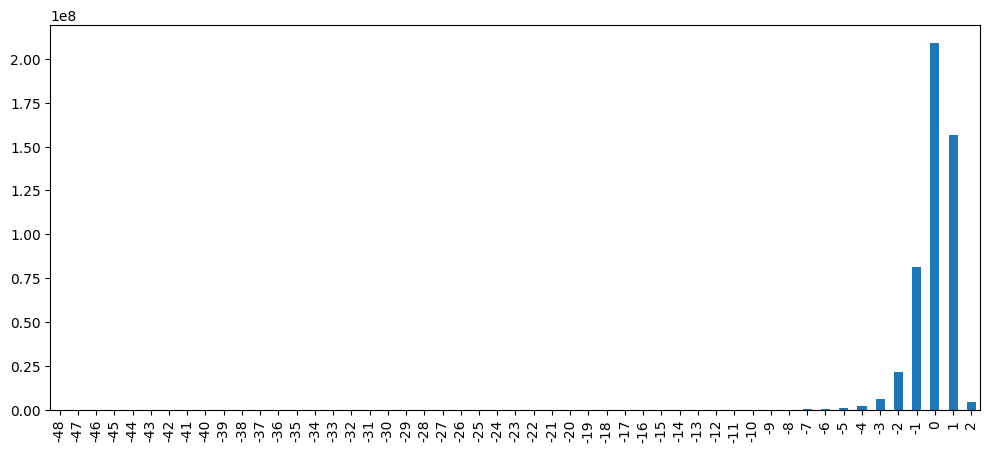

In [27]:
normalized_condensed = defaultdict(int)
for value, count in score_counts.items():
    if not pd.isna(float(value)):
        normalized_condensed[round((float(value) - mean)/standard_deviation)] += count
pd.Series(normalized_condensed).sort_index().plot.bar(figsize=(12, 5))

In [29]:
100 * pd.Series(normalized_condensed).sort_index() / pd.Series(normalized_condensed).sum()

-48     0.004660
-47     0.000007
-46     0.000004
-45     0.000048
-44     0.000064
-43     0.000070
-42     0.000061
-41     0.000049
-40     0.000044
-39     0.000034
-38     0.000026
-37     0.000024
-36     0.000018
-35     0.000026
-34     0.000018
-33     0.000019
-32     0.000022
-31     0.000019
-30     0.000024
-29     0.000030
-28     0.000020
-27     0.000029
-26     0.000036
-25     0.000031
-24     0.000044
-23     0.000044
-22     0.000047
-21     0.000053
-20     0.000051
-19     0.000068
-18     0.000073
-17     0.000093
-16     0.000135
-15     0.000197
-14     0.000330
-13     0.000554
-12     0.001068
-11     0.001989
-10     0.003746
-9      0.007444
-8      0.014777
-7      0.028742
-6      0.067904
-5      0.170859
-4      0.453314
-3      1.306766
-2      4.400475
-1     16.873040
 0     43.340934
 1     32.475460
 2      0.846409
dtype: float64